<a href="https://colab.research.google.com/github/MuhammadBilal-403/Interboot/blob/main/BEGINNER_LEVEL_TASK_(PART_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/train.csv")

In [ ]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294285 entries, 0 to 294284
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           294285 non-null  int64  
 1   date         294285 non-null  object 
 2   store_nbr    294285 non-null  int64  
 3   family       294285 non-null  object 
 4   sales        294284 non-null  float64
 5   onpromotion  294284 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 13.5+ MB


In [ ]:
df.shape

(294285, 6)

In [ ]:
df.isnull().sum()


,0
id,0
date,0
store_nbr,0
family,0
sales,1
onpromotion,1


In [ ]:
df['onpromotion'].fillna(0, inplace=True)
df['sales'].fillna(0, inplace=True)


/tmp/ipython-input-1683284465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['onpromotion'].fillna(0, inplace=True)
/tmp/ipython-input-1683284465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
df['store_nbr'].fillna(0, inplace=True)
df['family'].fillna(0, inplace=True)

/tmp/ipython-input-546441327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_nbr'].fillna(0, inplace=True)
/tmp/ipython-input-546441327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [ ]:
df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0


In [ ]:
df['sales'].describe()


,sales
count,294285.000000
mean,202.714804
std,685.692729
min,0.000000
25%,0.000000
50%,0.000000
75%,92.728000
max,26067.000000


In [ ]:
daily_sales = df.groupby('date')['sales'].sum()


In [ ]:
daily_sales

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229
...,...
2013-06-11,283858.215993
2013-06-12,320173.577999
2013-06-13,282886.920045


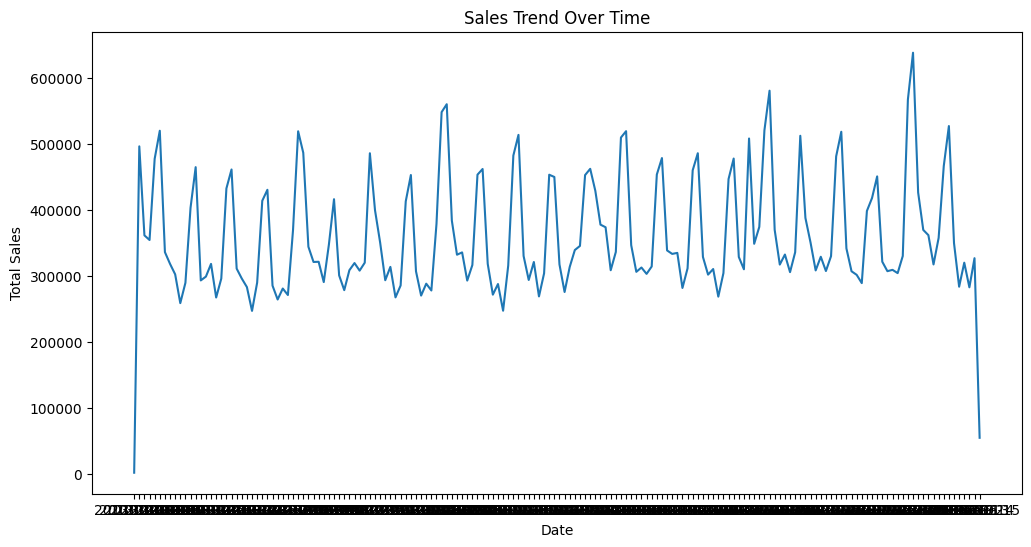

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_sales)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294285 entries, 0 to 294284
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           294285 non-null  int64         
 1   date         294285 non-null  datetime64[ns]
 2   store_nbr    294285 non-null  int64         
 3   family       294285 non-null  object        
 4   sales        294285 non-null  float64       
 5   onpromotion  294285 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 13.5+ MB


In [ ]:
df = df.dropna(subset=['date'])


In [ ]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


In [ ]:
monthly_sales = df.groupby(['year', 'month'], as_index=False)['sales'].sum()


In [ ]:
monthly_sales.head()
monthly_sales.shape


(6, 3)

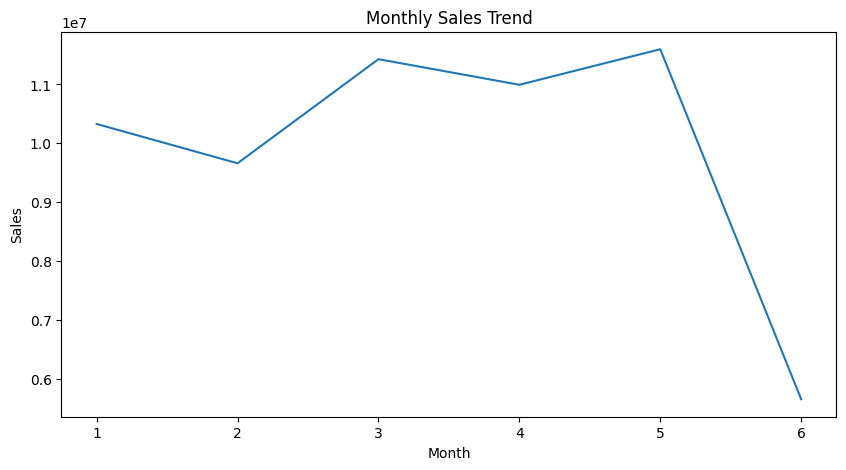

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['month'], monthly_sales['sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()



In [ ]:
family_sales = df.groupby('family')['sales'].sum().sort_values(ascending=False)
family_sales.head(20)


,sales
family,
GROCERY I,2.438907e+07
BEVERAGES,9.432740e+06
CLEANING,7.893359e+06
BREAD/BAKERY,3.119824e+06
DAIRY,3.072305e+06
MEATS,2.873870e+06
DELI,1.742102e+06
PERSONAL CARE,1.693870e+06
POULTRY,1.692418e+06
